Last Updated 08-03-2017

# Table of Contents
 <p><div class="lev2 toc-item"><a href="#Imports" data-toc-modified-id="Imports-01"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Imports</a></div><div class="lev2 toc-item"><a href="#Plotting-data-in-1-dimension" data-toc-modified-id="Plotting-data-in-1-dimension-02"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Plotting data in 1 dimension</a></div><div class="lev3 toc-item"><a href="#Adding-to-Existing-Axis" data-toc-modified-id="Adding-to-Existing-Axis-021"><span class="toc-item-num">0.2.1&nbsp;&nbsp;</span>Adding to Existing Axis</a></div><div class="lev3 toc-item"><a href="#Controlling-the-figure-size" data-toc-modified-id="Controlling-the-figure-size-022"><span class="toc-item-num">0.2.2&nbsp;&nbsp;</span>Controlling the figure size</a></div><div class="lev2 toc-item"><a href="#Plotting-data-in-2-dimensions" data-toc-modified-id="Plotting-data-in-2-dimensions-03"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Plotting data in 2 dimensions</a></div><div class="lev2 toc-item"><a href="#Faceting" data-toc-modified-id="Faceting-04"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Faceting</a></div><div class="lev3 toc-item"><a href="#Other-features" data-toc-modified-id="Other-features-041"><span class="toc-item-num">0.4.1&nbsp;&nbsp;</span>Other features</a></div><div class="lev2 toc-item"><a href="#Maps" data-toc-modified-id="Maps-05"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>Maps</a></div><div class="lev3 toc-item"><a href="#GeoViews" data-toc-modified-id="GeoViews-051"><span class="toc-item-num">0.5.1&nbsp;&nbsp;</span>GeoViews</a></div><div class="lev4 toc-item"><a href="#Loading-data-in-GeoViews-Dataset" data-toc-modified-id="Loading-data-in-GeoViews-Dataset-0511"><span class="toc-item-num">0.5.1.1&nbsp;&nbsp;</span>Loading data in GeoViews Dataset</a></div><div class="lev2 toc-item"><a href="#Key-Points" data-toc-modified-id="Key-Points-06"><span class="toc-item-num">0.6&nbsp;&nbsp;</span>Key Points</a></div>

## Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('seaborn')
matplotlib.rcParams['figure.figsize'] = (12, 15)
import numpy as np
import pandas as pd
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf
import xarray as xr
from cartopy import crs

hv.notebook_extension()

In [2]:
%time ds = xr.open_dataset('/home/abanihi/Documents/climate-data/ERM/t85.an.sfc/e4moda.an.sfc.t85.sst.1957-2002.nc')

CPU times: user 24 ms, sys: 0 ns, total: 24 ms
Wall time: 23.9 ms


## Plotting data in 1 dimension

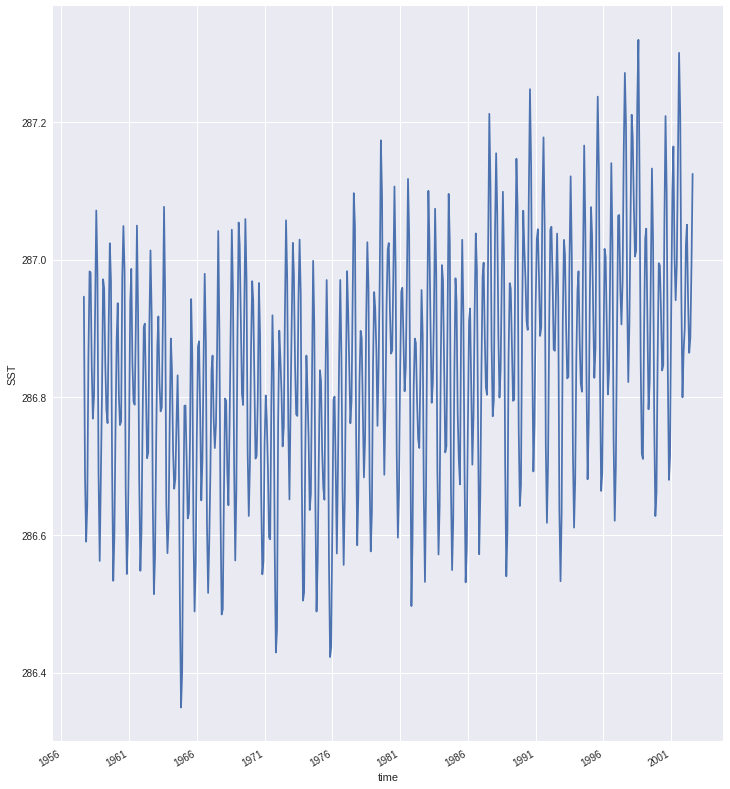

In [3]:
time_series = ds.mean(dim=['lat', 'lon']).SST
time_series.plot()

Your plots can be **customized** using syntax that is very similar to Matplotlib.

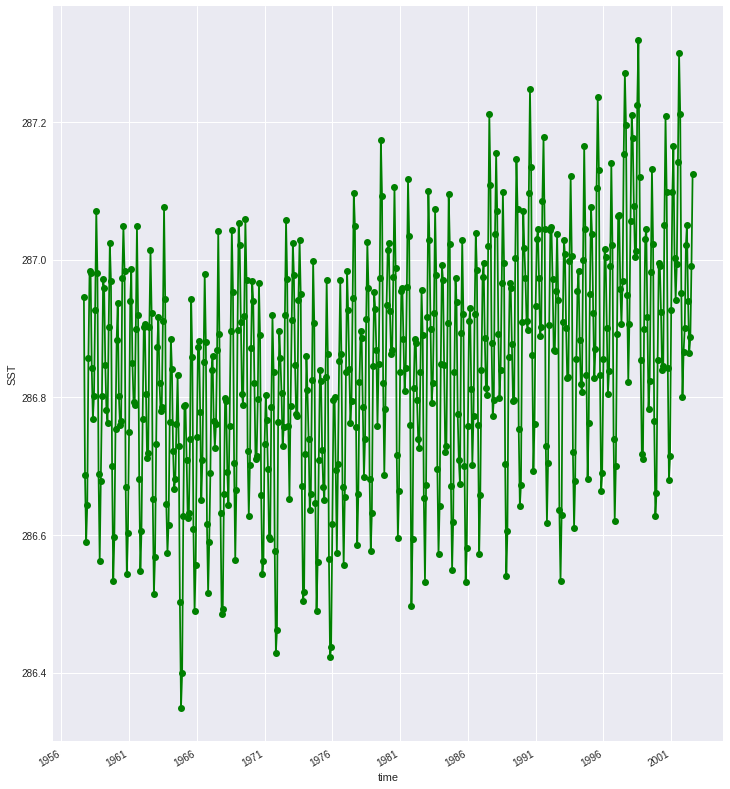

In [4]:
time_series.plot.line(color='green', marker='o')

### Adding to Existing Axis

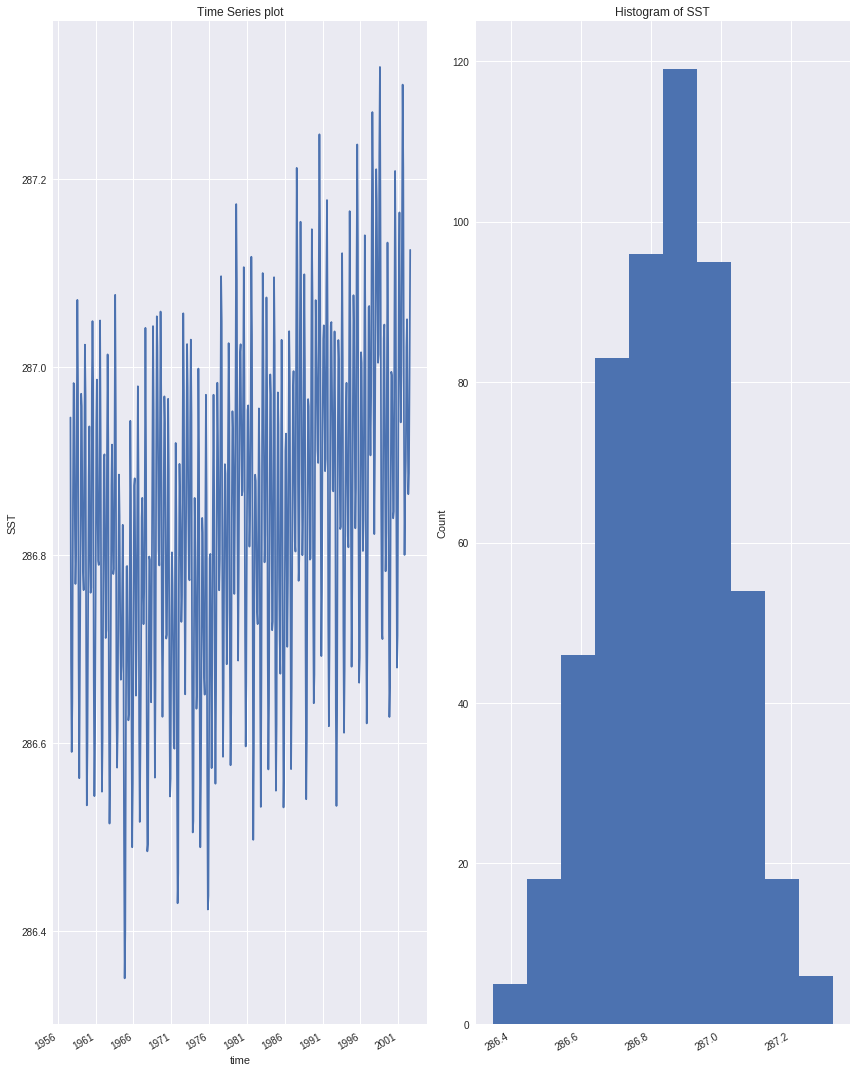

In [5]:
fig, axes = plt.subplots(ncols=2)
axes
time_series.plot(ax=axes[0])
time_series.plot.hist(ax=axes[1])
axes[0].set_title('Time Series plot')
plt.tight_layout()

### Controlling the figure size

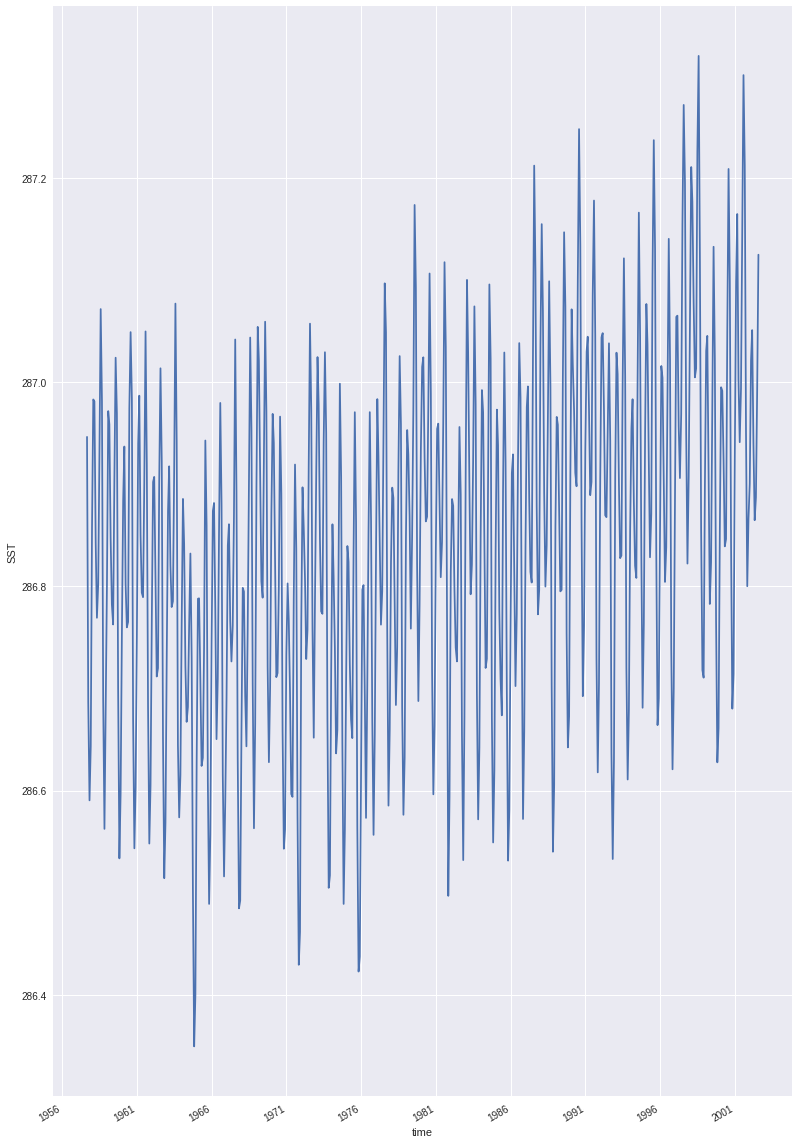

In [6]:
time_series.plot(aspect=0.7, size=16)
plt.tight_layout()

## Plotting data in 2 dimensions

- Since many xarray applications involve geospatial datasets, xarray’s plotting extends to maps in 2 dimensions. Let’s first select a 2-D subset of our data by choosing a single date and retaining all the latitude and longitude dimensions:

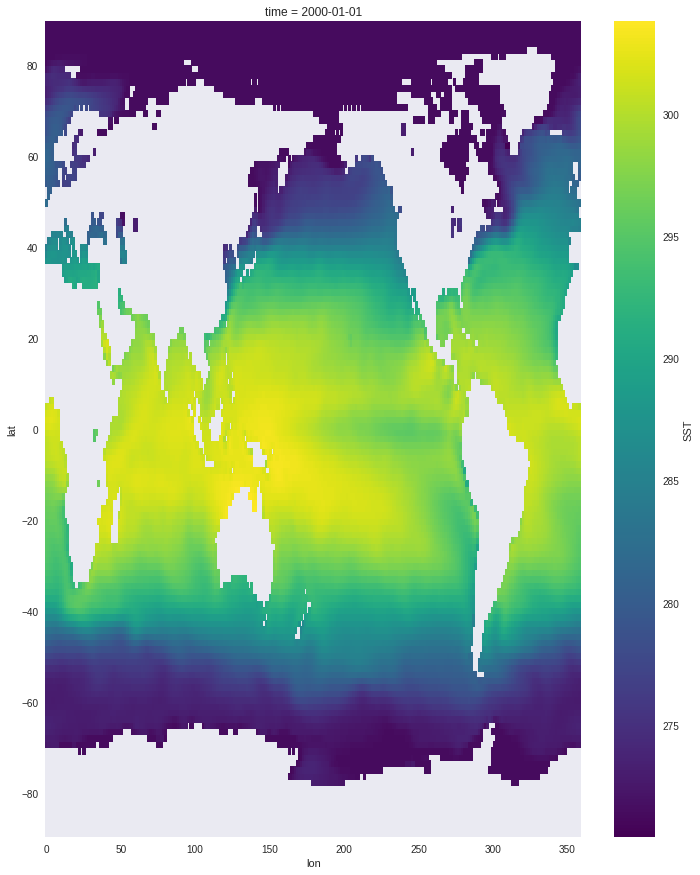

In [7]:
map_data = ds['SST'].sel(time='2000-01-01')
map_data.plot()

- Note that in the above label-based lookup, we did not specify the latitude and longitude dimensions, in which case xarray assumes we want to return all elements in those dimensions.
- Customization can occur following standard Matplotlib syntax. Note that before we use matplotlib

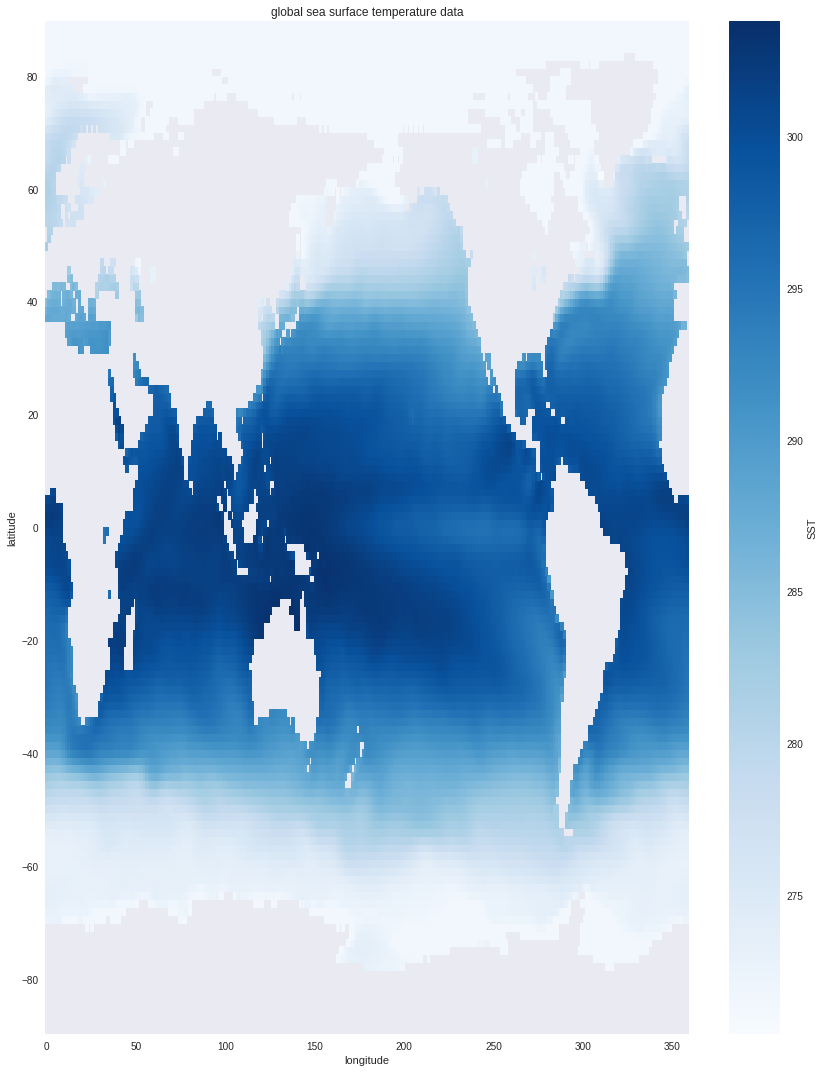

In [8]:
map_data.plot(cmap=plt.cm.Blues)
plt.title('global sea surface temperature data')
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.tight_layout()

## Faceting


Faceting here refers to splitting an array along one or two dimensions and plotting each group. xarray’s basic plotting is useful for plotting two dimensional arrays. What about three or four dimensional arrays? That’s where facets become helpful.

In [9]:
time_series = ds['SST'].sel(time=slice('1957-09-01', '1958-08-01'))

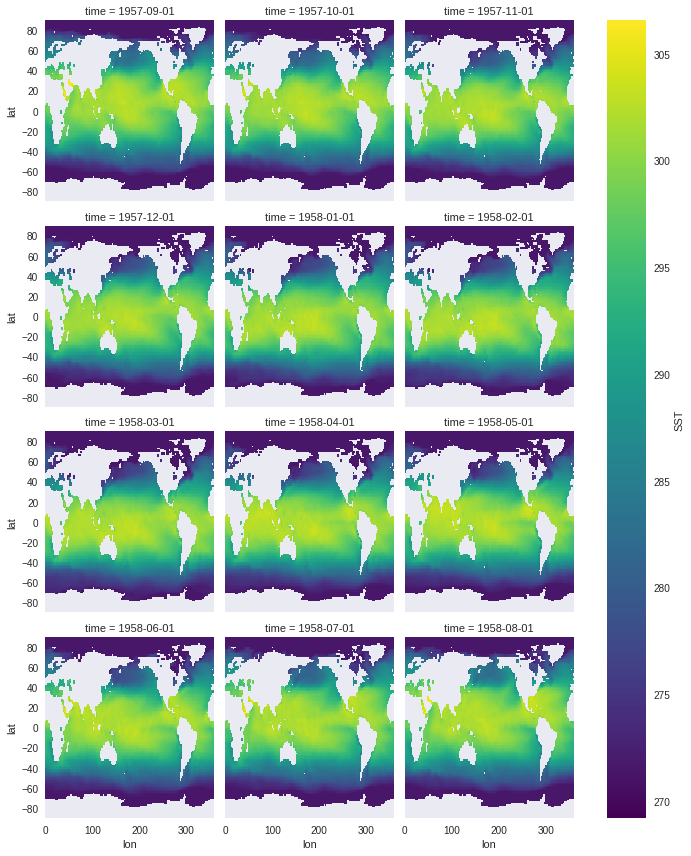

In [10]:
time_series.plot(x='lon', y='lat', col='time', col_wrap=3)

### Other features

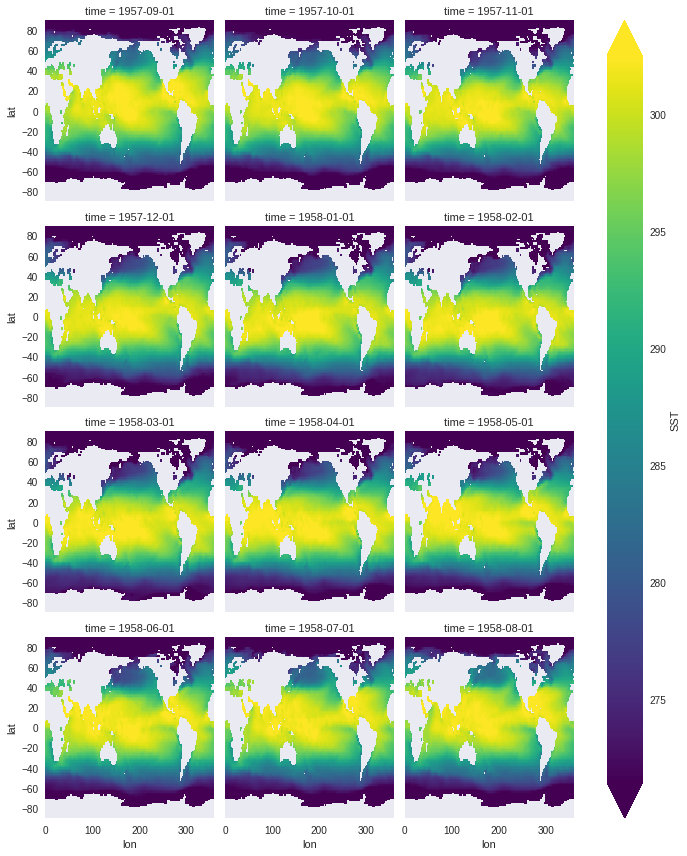

In [11]:
time_series.plot.pcolormesh(x='lon', y='lat', col='time', col_wrap=3,
                           robust=True, cmap='viridis')

## Maps

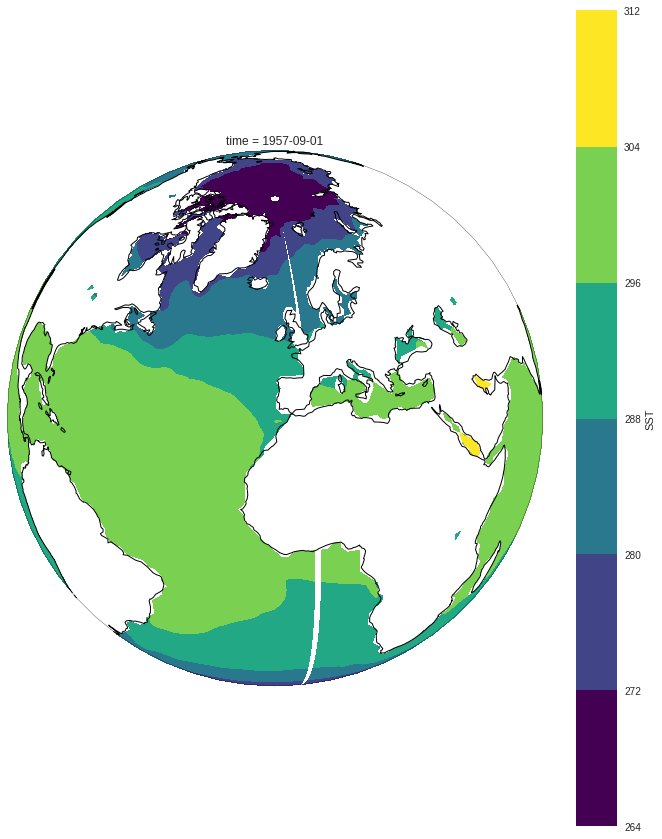

In [12]:
ax = plt.axes(projection=crs.Orthographic(-10, 35))
time_series.isel(time=0).plot.contourf(ax=ax, transform=crs.PlateCarree());
ax.set_global(); ax.coastlines();


- When faceting on maps, the projection can be transferred to the ```plot``` function using the ```subplot_kws``` keyword. The axes for the subplots created by faceting are accessible in the object returned by ```plot```:

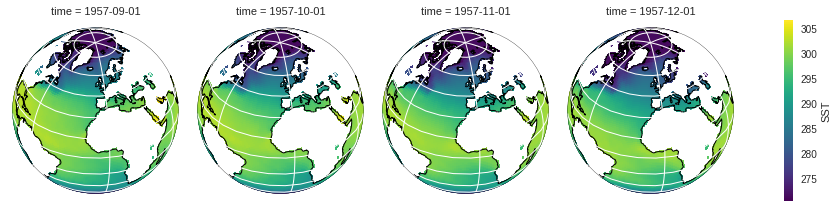

In [13]:
p = time_series.isel(time=slice(0, 4)).plot(transform=crs.PlateCarree(),
                                      col='time', 
                                      subplot_kws={'projection': crs.Orthographic(-10, 35)})
for ax in p.axes.flat:
    ax.coastlines()
    ax.gridlines()
    


### GeoViews

In [14]:
%opts Image {+framewise} [colorbar=True] Curve [xrotation=60]
%output max_frames=1000 

#### Loading data in GeoViews Dataset

- wrapping the data in a GeoViews Dataset Element and declaring the key dimensions ( kdims ) and value dimensions ( vdims 

In [15]:
kdims = ['time', 'lat', 'lon']
vdims = ['SST']

xr_dataset = gv.Dataset(time_series, kdims=kdims, vdims=vdims,
                       crs=crs.PlateCarree())

To visualize the datasets, in a single line of code we can specify that we want to view it as a collection of Images indexed by longitude and latitude (a HoloViews ```HoloMap``` of ```gv.Image``` elements):

:HoloMap   [time]
   :Image   [lon,lat]   (SST)
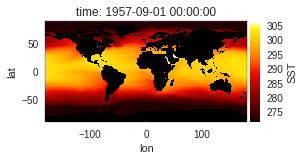
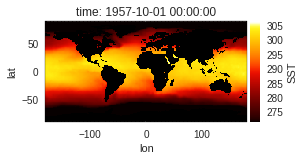
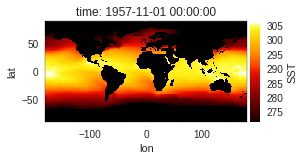
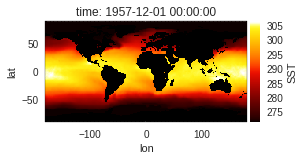
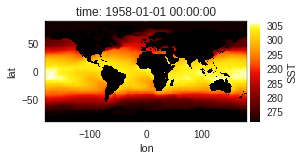
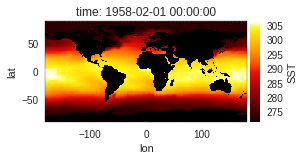
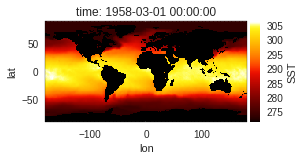
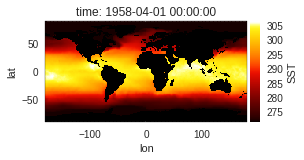
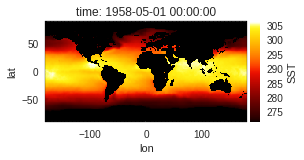
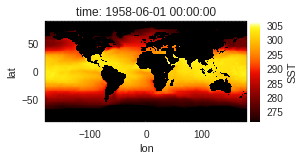
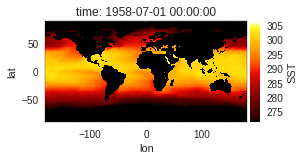
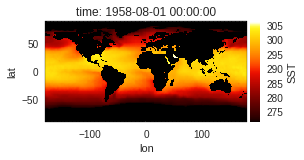

In [16]:
xr_dataset.to(gv.Image, ['lon', 'lat'])

## Key Points

- xarray has plotting functinality that is a thin wrapper around the Matplotlib library
- xarray uses syntax and function names from Matplotlib whenever possible